In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("CAR DETAILS.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
# Check shape of data
df.shape

(4340, 8)

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(3577, 8)

In [5]:
# Split name column into two columns - car_maker and car_model
name = df["name"].str.split(" ", expand = True)
df["car_maker"] = name[0]
df["car_model"] = name[1]

In [6]:
# Calculate car age
df["car_age"] = 2023 - df["year"]
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [7]:
# drop the name columns
df.drop(["name"], axis=1, inplace=True)

In [8]:
# Checking Columns
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [9]:
# creating obj for Lable Encoder
encoder= LabelEncoder()

In [10]:
# Creating a for loop for Encoding multiple columns
encoded_columns = df[['fuel', 'seller_type', 'transmission', 'owner',"car_maker", "car_model"]]

for i in encoded_columns:
  df[i] = encoder.fit_transform(df[i])

In [11]:
# Checking Data head
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model,car_age
0,2007,60000,70000,4,1,1,0,18,6,16
1,2007,135000,50000,4,1,1,0,18,164,16
2,2012,600000,100000,1,1,1,0,10,161,11
3,2017,250000,46000,4,1,1,0,5,125,6
4,2014,450000,141000,1,1,1,2,9,17,9


In [12]:
# Split data into features and target
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [14]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [15]:
# creating function for evaluate model and printing scores
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"Evaluating {name}:")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("MAE:", mae)
        print("MSE:", mse)
        print("R2 Score:", r2)
        print("Training Score: ", model.score(X_train, y_train))
        print("Testing Score: ", model.score(X_test, y_test))
        print()
        
# Call the function to evaluate models        
evaluate_models(models, X_train, y_train, X_test, y_test)

Evaluating Linear Regression:
MAE: 230331.2755446433
MSE: 152462807277.5198
R2 Score: 0.39025136863454246
Training Score:  0.43697262242827006
Testing Score:  0.39025136863454246

Evaluating Ridge Regression:
MAE: 230213.41697530748
MSE: 152335346539.97128
R2 Score: 0.3907611258117901
Training Score:  0.43696836632380165
Testing Score:  0.3907611258117901

Evaluating Lasso Regression:
MAE: 230330.80535690504
MSE: 152462345947.92188
R2 Score: 0.39025321364248877
Training Score:  0.43697262235941003
Testing Score:  0.39025321364248877

Evaluating KNeighbors Regressor:
MAE: 279060.2069832402
MSE: 266746121320.80997
R2 Score: -0.06680498215770525
Training Score:  0.3545540094709775
Testing Score:  -0.06680498215770525

Evaluating Random Forest Regressor:
MAE: 131481.6137392868
MSE: 80632901166.34564
R2 Score: 0.6775226561340195
Training Score:  0.9517341841212751
Testing Score:  0.6775226561340195



In [16]:
###  using hyper-perameter tuingng Random Forest Regressionrandom_state = 7, max_depth=10
rf= RandomForestRegressor(max_depth=12, random_state = 7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, random_state=7)

In [17]:
# creating function for print mae, mse, rmse, r2score and also training and testing score
def scores(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)
  print("MAE: ", mae)
  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2 Score: ", r2)

def model_score(model):
  print("Training Score: ", model.score(X_train, y_train))
  print("Testing Score: ", model.score(X_test, y_test))


In [18]:
# Call the function to print results
model_score(rf)

y_pred= rf.predict(X_test)

scores(y_test,y_pred)

Training Score:  0.9449771797328029
Testing Score:  0.6852336249772625
MAE:  132037.05537469726
MSE:  78704834589.07819
RMSE:  280543.81937422574
R2 Score:  0.6852336249772625


In [19]:
### Saving the best model using Pickle
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [20]:
# creating sample dataset
df_sample = df.sample(n=20, random_state = 15)
df_sample.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model,car_age
249,2018,500000,32000,4,1,1,0,10,74,5
1869,2016,360000,30000,4,1,1,0,18,147,7
3319,2016,700000,160000,1,1,1,0,23,48,7
3964,2014,550000,58231,1,0,1,0,23,48,9
1258,2017,220000,40000,4,1,1,0,5,125,6


In [21]:
# Saving the Sample Dataset
df_sample.to_csv("sample-dataset.csv")

In [22]:
# Load the saved trained ML model
with open('rfmodel.pkl', 'rb') as file:
    best_model = pickle.load(file)
best_model

RandomForestRegressor(max_depth=12, random_state=7)

In [23]:
# Selecting 20 Dependent and Independent Variable randomly from dataset

x_sample = df_sample.drop("selling_price", axis = 1)
y_sample = df_sample["selling_price"]
print(x_sample.shape)
print(y_sample.shape)

(20, 9)
(20,)


In [24]:
# Generate the Predictions for randomly 20 points selected from dataset
ypred_sample = best_model.predict(x_sample)
ypred_sample

array([508698.81432385, 410101.88629752, 630062.64598297, 587203.15517081,
       294708.77141787, 112606.8675    ,  96885.35362211, 140805.26592854,
        76878.03049513, 245255.76964797, 595846.50399101, 398798.33333333,
       306462.42845698,  72973.57444395, 328013.45958746, 275755.60177139,
       745584.65889613, 147856.34436026, 301960.62214465, 317213.43233547])

In [25]:
# creating function for print mae, mse, rmse, r2score and also training and testing score of sample dataset 
model_score(best_model)

scores(y_sample,ypred_sample)

Training Score:  0.9449771797328029
Testing Score:  0.6852336249772625
MAE:  35801.38209340903
MSE:  2226435240.2936506
RMSE:  47185.11672438303
R2 Score:  0.9507518444475341


In [26]:
# Perform cross-validation for the RandomForestRegressor
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Mean MSE:", cv_mse_scores.mean())

Cross-Validation MSE Scores: [1.37821688e+11 6.24444308e+10 3.59972311e+10 2.76206887e+10
 1.62737857e+11]
Mean MSE: 85324379092.7302


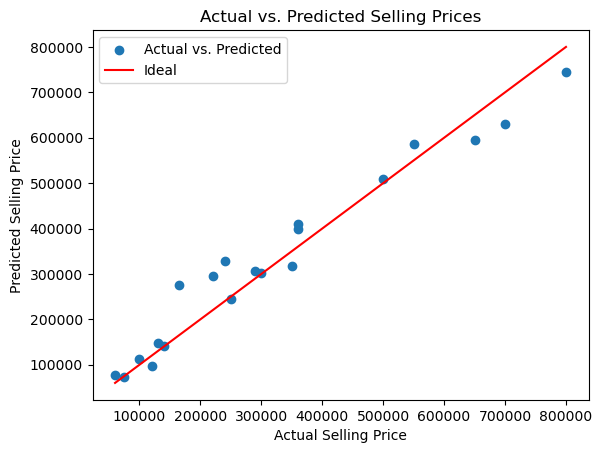

In [27]:
# Visualize predicted vs. actual selling prices
plt.scatter(y_sample, ypred_sample, label='Actual vs. Predicted')
plt.plot([min(y_sample), max(y_sample)], [min(y_sample), max(y_sample)], color='red', label='Ideal')

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()